#### Get required libraries

In [7]:
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install scikit-learn
!pip install seaborn
!pip install plotly
!pip install nbformat
!pip install ipykernel
!pip install --upgrade nbformat


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.6 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.6 kB 653.6 kB/s eta 0:00:01
     -------------------------------------- 60.6/60.6 kB 645.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
    --------------------------------------- 0.2/10.6 MB 4.8 MB/s eta 0:00:03
   --- ------------------------------------ 1.0/10.6 MB 12.6 MB/s eta 0:00:01
   -------- ------------------------------- 2.2/10.6 MB 17.7 MB/s eta 0:00:01
   ------------- -------------------------- 3.6/10.6 MB 19.0 MB/s eta 0:00:01
   ------------------ --------------------- 4.8/10.6 MB 21.9 MB/s eta 0:00:01
   ---------------------- ----------------- 5.9/10.6 MB 22.2 MB/s eta 0:00:01
   ------------------------ --------------- 6.4/10.6 MB 20.4 MB/s eta 0:00:01
   ---------------------------- ----------- 7.6/10.6 MB 21.0 MB/s eta 0:00:01
  


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/15.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.7 MB 653.6 kB/s eta 0:00:24
   ---------------------------------------- 0.2/15.7 MB 1.7 MB/s eta 0:00:09
   - -------------------------------------- 0.5/15.7 MB 4.1 MB/s eta 0:00:04
   --- ------------------------------------ 1.3/15.7 MB 7.4 MB/s eta 0:00:02
   ----- ---------------------------------- 2.0/15.7 MB 9.7 MB/s eta 0:00:02
   -------- ------------------------------- 3.4/15.7 MB 13.7 MB/s eta 0:00:01
   ----------- ---------------------------- 4.6/15.7 MB 16.5 MB/s eta 0:00:01
   -------------- ------------------------- 5.7/15.7 MB 17.4 MB/s eta 0:00:01
   ----------------- ---------------------- 6.9/15.7 MB 18.4 MB/s eta 0:00:01
   -------------------- ------------------- 8.0/15.7 MB 19.0 MB/s eta 0:00:01
   ---------------------- ----------------- 8.9/15.7 MB 19.6 MB/s eta 0:00:01
   --


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/78.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/78.5 kB ? eta -:--:--
   --------------- ------------------------ 30.7/78.5 kB 660.6 kB/s eta 0:00:01
   ------------------------------------ --- 71.7/78.5 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------- 78.5/78.5 kB 874.5 kB/s eta 0:00:00
  Attempting uninstall: nbformat
    Found existing installation: nbformat 5.9.2
    Uninstalling nbformat-5.9.2:
      Successfully uninstalled nbformat-5.9.2



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


#### imports, and get input data

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import plotly.express as px
from datetime import datetime

In [10]:
certificate_holders = pd.read_csv('./output_data/certificate_holders_validated.csv')
volume_and_crops = pd.read_csv('./output_data/volume_and_crops_validated.csv')

#### ⚡ Merging datasets
💡 Assumed that ['Certificate Holder ID', 'Certificate ID'] can be a good choice for merging two datasets.

✅ Needs to check with data model documents

In [11]:
merged_data = pd.merge(certificate_holders, volume_and_crops, on=['Certificate Holder ID', 'Certificate ID'])
merged_data.head(5)

,Certificate Holder ID,Certificate ID,Country,Certificate Type,Certificate end date,Certificate start date,Crop,Estimated harvested volume
0,CH000371,LI5FD7A1,Country B,Multi Farm,2024-06-09 00:00:00,2023-06-09 00:00:00,Coffee,1126752.0
1,CH001623,LI39CBD9,Country B,Multi Farm,2023-04-01 00:00:00,2022-04-01 00:00:00,Coffee,1250892.0
2,CH001623,LI5A0564,Country B,Multi Farm,2024-07-02 00:00:00,2023-04-02 00:00:00,Coffee,852360.0
3,CH004BB5,LI42F47A,Country B,Group Of Mixed Farms,2023-05-15 00:00:00,2022-05-16 00:00:00,Coffee,1034720.0
4,CH004BB5,LIAEA700,Country B,Multi Farm,2024-05-15 00:00:00,2023-05-16 00:00:00,Coffee,993900.0


#### 1: Descriptive statistics of numerical fields such as estimated harvested volume.

In [12]:
desc_stats = merged_data['Estimated harvested volume'].describe()

print("Descriptive Statistics for Estimated Harvested Volume:")
print("-----------------------------------------------------")
print(f"Count: {desc_stats['count']:,.0f} entries")
print(f"Mean: {desc_stats['mean']:,.2f} units")
print(f"Standard Deviation: {desc_stats['std']:,.2f} units")
print(f"Minimum: {desc_stats['min']:,.2f} units")
print(f"25th Percentile: {desc_stats['25%']:,.2f} units")
print(f"Median (50th Percentile): {desc_stats['50%']:,.2f} units")
print(f"75th Percentile: {desc_stats['75%']:,.2f} units")
print(f"Maximum: {desc_stats['max']:,.2f} units")

Descriptive Statistics for Estimated Harvested Volume:
-----------------------------------------------------
Count: 1,115 entries
Mean: 1,681,609.50 units
Standard Deviation: 3,236,018.33 units
Minimum: 0.80 units
25th Percentile: 277,800.00 units
Median (50th Percentile): 702,504.00 units
75th Percentile: 1,652,128.10 units
Maximum: 49,039,389.00 units


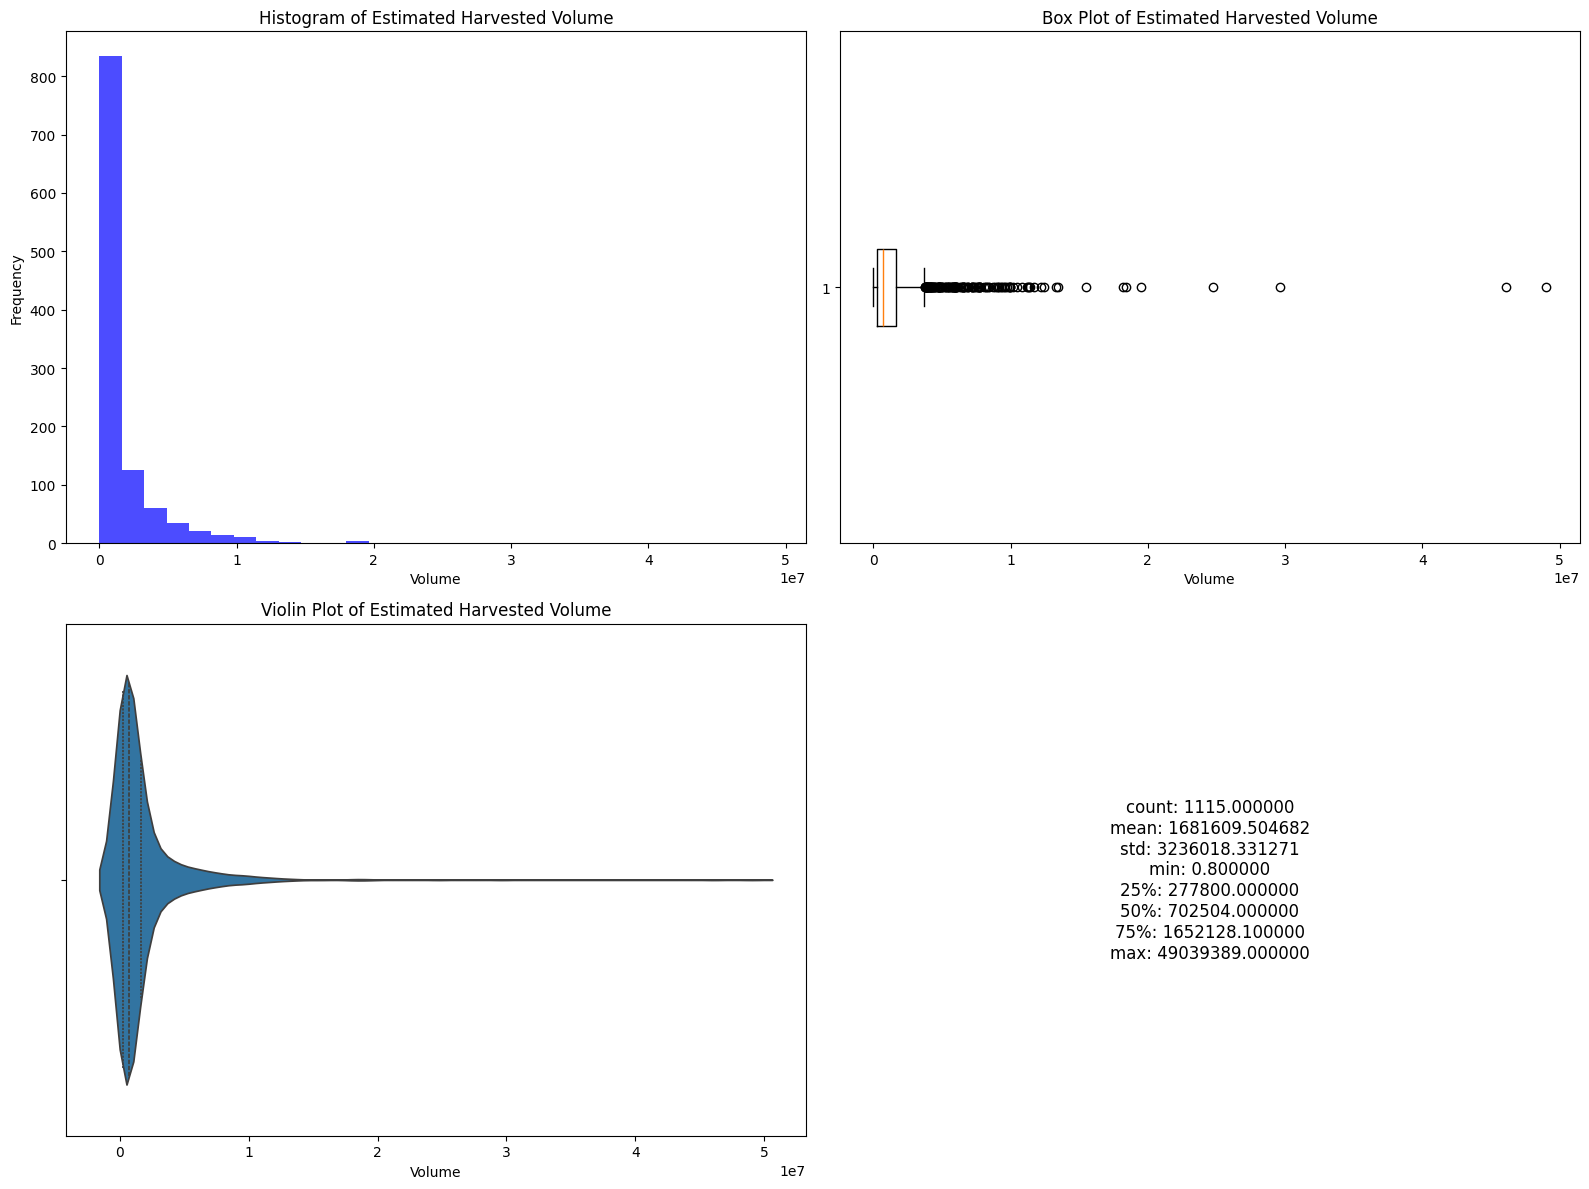

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Histogram
axs[0, 0].hist(merged_data['Estimated harvested volume'], bins=30, color='blue', alpha=0.7)
axs[0, 0].set_title('Histogram of Estimated Harvested Volume')
axs[0, 0].set_xlabel('Volume')
axs[0, 0].set_ylabel('Frequency')

# Boxplot
axs[0, 1].boxplot(merged_data['Estimated harvested volume'], vert=False)
axs[0, 1].set_title('Box Plot of Estimated Harvested Volume')
axs[0, 1].set_xlabel('Volume')

# Violin Plot
sns.violinplot(ax=axs[1, 0], data=merged_data, x='Estimated harvested volume', inner='quartile')
axs[1, 0].set_title('Violin Plot of Estimated Harvested Volume')
axs[1, 0].set_xlabel('Volume')

# Descriptive Stats
desc_stats = merged_data['Estimated harvested volume'].describe().apply(lambda x: format(x, 'f'))
stat_text = '\n'.join([f"{stat}: {value}" for stat, value in desc_stats.items()])
axs[1, 1].axis('off')
axs[1, 1].text(0.5, 0.5, stat_text, fontsize=12, ha='center', va='center')

plt.tight_layout()
plt.show()


#### 2: Count of certificate types to see which certificate type is most common

In [56]:
certificate_holders['Certificate Type'].value_counts()

Certificate Type
Single Farm             958
Group Of Small Farms    550
Multi Farm              374
Group Of Mixed Farms    149
Single Site               3
Name: count, dtype: int64

In [57]:
merged_data['Certificate start date'] = pd.to_datetime(merged_data['Certificate start date'])
merged_data['Certificate end date'] = pd.to_datetime(merged_data['Certificate end date'])

# Extract year and month for further analysis
merged_data['Year Issued'] = merged_data['Certificate start date'].dt.year
merged_data['Month Issued'] = merged_data['Certificate start date'].dt.strftime('%Y-%m') 

In [58]:
certificate_type_counts = merged_data['Certificate Type'].value_counts().reset_index()
certificate_type_counts.columns = ['Certificate Type', 'Count']  # Rename columns for clarity

fig = px.bar(certificate_type_counts, x='Certificate Type', y='Count',
             title='Count of Certificate Types', labels={'Certificate Type': 'Type', 'Count': 'Number of Certificates'})
fig.show()

In [59]:
fig = px.histogram(merged_data, x='Certificate Type', color='Country',
                   animation_frame='Year Issued', barmode='group',
                   title='Count of Certificate Types by Country and Year')
fig.update_layout(xaxis_title="Certificate Type", yaxis_title="Count")
fig.show()


In [60]:
# Group by Year Issued, Crop, and Country and count the entries
yoy_data = merged_data.groupby(['Year Issued', 'Crop', 'Country']).size().reset_index(name='Count')

# Create an interactive line plot with Plotly
fig = px.line(yoy_data, x='Year Issued', y='Count', color='Country', line_group='Crop', 
              line_shape='linear', hover_name='Crop', title='Year-Over-Year Trends by Crop and Country')
fig.update_layout(xaxis_title='Year', yaxis_title='Number of Certificates', legend_title='Country')
fig.show()

In [61]:
mom_data = merged_data.groupby(['Month Issued', 'Crop', 'Country']).size().reset_index(name='Count')

# Create an interactive line plot with Plotly
fig = px.line(mom_data, x='Month Issued', y='Count', color='Country', line_group='Crop', 
              line_shape='linear', hover_name='Crop', title='Month-Over-Month Trends by Crop and Country')
fig.update_layout(xaxis_title='Month', yaxis_title='Number of Certificates', legend_title='Country', xaxis={'type': 'category'})
fig.show()

#### 3: List unique crops and their counts.

In [62]:
volume_and_crops['Crop'].value_counts()

Crop
Coffee    1118
Cocoa       26
Tea          3
Name: count, dtype: int64

#### 4: Total estimated volume harvested per crop.

In [63]:
volume_per_crop = volume_and_crops.groupby('Crop')['Estimated harvested volume'].sum()
formatted_volume_per_crop = volume_per_crop.apply(lambda x: f"{x:,.0f}")
print(formatted_volume_per_crop)

Crop
Cocoa        13,561,333
Coffee    1,906,118,974
Tea              51,558
Name: Estimated harvested volume, dtype: object


#### 5: Find certificate holders with multiple certificates.

In [64]:
certificate_holders['Certificate Holder ID'].value_counts().where(lambda x: x > 1).dropna()

Certificate Holder ID
CH43676B   4.00
CHA6608E   4.00
CH698EFE   3.00
CH2622D3   3.00
CH23BF4D   3.00
           ... 
CH4018D0   2.00
CHF04403   2.00
CH3EC767   2.00
CH498D4B   2.00
CH65C56B   2.00
Name: count, Length: 754, dtype: float64

In [65]:
holder_counts = certificate_holders['Certificate Holder ID'].value_counts()
multi_certificate_holders = holder_counts.where(lambda x: x > 1).dropna()

# Convert to DataFrame for visualization
df = multi_certificate_holders.reset_index()
df.columns = ['Certificate Holder ID', 'Number of Certificates']

# Ensure the count is integer type
df['Number of Certificates'] = df['Number of Certificates'].astype(int)
# Create a histogram to visualize the frequency of certificate counts
fig = px.histogram(df, x='Number of Certificates', nbins=int(df['Number of Certificates'].max()), text_auto=True,
                   title="Distribution of Number of Certificates Per Holder",
                   labels={'Number of Certificates': 'Number of Certificates'},
                   opacity=0.8)

# Update layout for better readability
fig.update_layout(bargap=0.2, xaxis_title='Number of Certificates', yaxis_title='Number of Certificate Holders')
fig.show()


#### 6: Time span of certificates by calculating the duration between start and end

✅ Need to discuss with process owners to set the values more accurate to certification issueing required time

In [66]:
def categorize_duration(days):
    if days < 0:
        return 'Expired'
    elif days < 30:
        return 'Expiring Soon'
    elif days < 60:
        return 'Close to Expiry'
    elif days < 120:
        return 'Valid'
    else:
        return 'Fresh'

In [70]:
merged_data['Certificate end date'] = pd.to_datetime(merged_data['Certificate end date'])
merged_data['Certificate start date'] = pd.to_datetime(merged_data['Certificate start date'])

merged_data['Duration'] = merged_data['Certificate end date'] - merged_data['Certificate start date']
merged_data['Remaining Duration'] = (merged_data['Certificate end date'] - pd.Timestamp(datetime.now())).dt.days
merged_data['Validity Category'] = merged_data['Remaining Duration'].apply(categorize_duration)

merged_data.head(5)


,Certificate Holder ID,Certificate ID,Country,Certificate Type,Certificate end date,Certificate start date,Crop,Estimated harvested volume,Year Issued,Month Issued,Duration,Remaining Duration,Validity Category
0,CH000371,LI5FD7A1,Country B,Multi Farm,2024-06-09,2023-06-09,Coffee,"1,126,752.00",2023,2023-06,366 days,39,Close to Expiry
1,CH001623,LI39CBD9,Country B,Multi Farm,2023-04-01,2022-04-01,Coffee,"1,250,892.00",2022,2022-04,365 days,-396,Expired
2,CH001623,LI5A0564,Country B,Multi Farm,2024-07-02,2023-04-02,Coffee,"852,360.00",2023,2023-04,457 days,62,Valid
3,CH004BB5,LI42F47A,Country B,Group Of Mixed Farms,2023-05-15,2022-05-16,Coffee,"1,034,720.00",2022,2022-05,364 days,-352,Expired
4,CH004BB5,LIAEA700,Country B,Multi Farm,2024-05-15,2023-05-16,Coffee,"993,900.00",2023,2023-05,365 days,14,Expiring Soon


In [73]:
validity_counts = merged_data['Validity Category'].value_counts().reset_index()
validity_counts.columns = ['Validity Category', 'Count']

# First visualization: Validity Category Count
fig1 = px.bar(validity_counts, 
              x='Validity Category', 
              y='Count',
              labels={'Validity Category': 'Validity Category', 'Count': 'Count'},
              title='Count of Validity Categories')

# Prepare the data for the second visualization by counting categories by country
category_by_country = merged_data.groupby(['Country', 'Validity Category']).size().reset_index(name='Count')

# Second visualization: Validity Category Count by Country
fig2 = px.bar(category_by_country, 
              x='Country', 
              y='Count',
              color='Validity Category',
              text='Count',
              title='Count of Validity Categories per Country',
              barmode='group')

# Show the figures
fig1.show()
fig2.show()

#### 7: Trend over time of certificates issued by year.

In [75]:
merged_data['Year Issued'] = merged_data['Certificate start date'].dt.year
merged_data['Year Issued'].value_counts().sort_index()
merged_data.head(5)

,Certificate Holder ID,Certificate ID,Country,Certificate Type,Certificate end date,Certificate start date,Crop,Estimated harvested volume,Year Issued,Month Issued,Duration,Remaining Duration,Validity Category
0,CH000371,LI5FD7A1,Country B,Multi Farm,2024-06-09,2023-06-09,Coffee,"1,126,752.00",2023,2023-06,366 days,39,Close to Expiry
1,CH001623,LI39CBD9,Country B,Multi Farm,2023-04-01,2022-04-01,Coffee,"1,250,892.00",2022,2022-04,365 days,-396,Expired
2,CH001623,LI5A0564,Country B,Multi Farm,2024-07-02,2023-04-02,Coffee,"852,360.00",2023,2023-04,457 days,62,Valid
3,CH004BB5,LI42F47A,Country B,Group Of Mixed Farms,2023-05-15,2022-05-16,Coffee,"1,034,720.00",2022,2022-05,364 days,-352,Expired
4,CH004BB5,LIAEA700,Country B,Multi Farm,2024-05-15,2023-05-16,Coffee,"993,900.00",2023,2023-05,365 days,14,Expiring Soon


#### 8: Most common country for certificate holders.

In [76]:
certificate_holders['Country'].value_counts().idxmax()


'Country A'

#### 9: Average certificate duration per type.

In [78]:
merged_data.groupby('Certificate Type')['Duration'].mean()


Certificate Type
Group Of Mixed Farms   363 days 22:46:31.836734692
Group Of Small Farms   360 days 21:28:34.639175256
Multi Farm             365 days 06:34:17.142857144
Single Farm            365 days 14:01:17.419354840
Single Site                      363 days 00:00:00
Name: Duration, dtype: timedelta64[ns]

#### 10: Maximum and minimum estimated volumes per crop.

In [79]:
volume_and_crops.groupby('Crop')['Estimated harvested volume'].agg(['min', 'max'])

,min,max
Crop,,
Cocoa,200.00,"3,238,999.00"
Coffee,0.80,"49,039,389.00"
Tea,"16,421.68","18,163.86"


#### 11: Visualize volume distribution for a selected crop using histograms.

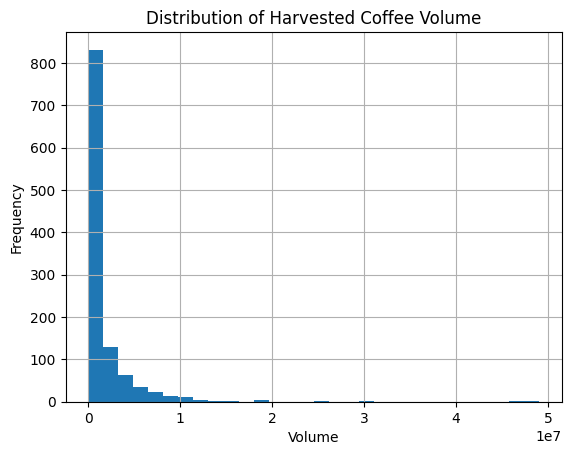

In [80]:
volume_and_crops[volume_and_crops['Crop'] == 'Coffee']['Estimated harvested volume'].hist(bins=30)
plt.title('Distribution of Harvested Coffee Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()


#### 12: Correlation matrix to find potential correlations in merged dataset.

In [81]:
numeric_cols = merged_data.select_dtypes(include=[np.number])
correlation_matrix = numeric_cols.corr()
print(correlation_matrix)

                            Estimated harvested volume  Year Issued  Duration  \
Estimated harvested volume                        1.00         0.02      0.07   
Year Issued                                       0.02         1.00     -0.12   
Duration                                          0.07        -0.12      1.00   
Remaining Duration                                0.04         0.93      0.04   

                            Remaining Duration  
Estimated harvested volume                0.04  
Year Issued                               0.93  
Duration                                  0.04  
Remaining Duration                        1.00  


#### 13: Map certificates by country (use count or sum of estimated volume).

In [84]:
merged_data.groupby('Country').size()

Country
Country A    253
Country B    606
Country C    213
Country D     43
dtype: int64

#### 14: Compare average volumes between different certificate types.

In [85]:
merged_data.groupby('Certificate Type')['Estimated harvested volume'].mean()

Certificate Type
Group Of Mixed Farms   3,443,470.57
Group Of Small Farms   2,129,328.47
Multi Farm             1,390,393.02
Single Farm              549,133.44
Single Site            1,222,900.80
Name: Estimated harvested volume, dtype: float64

#### 15: Check for any missing data in both datasets.

In [87]:
merged_data.isnull().sum()

Certificate Holder ID         0
Certificate ID                0
Country                       0
Certificate Type              0
Certificate end date          0
Certificate start date        0
Crop                          0
Estimated harvested volume    0
Year Issued                   0
Month Issued                  0
Duration                      0
Remaining Duration            0
Validity Category             0
dtype: int64

#### 16: Number of unique certificate holders in each country.

In [14]:
merged_data.groupby('Country')['Certificate Holder ID'].nunique()

Country
Country A    133
Country B    360
Country C    102
Country D     18
Name: Certificate Holder ID, dtype: int64